# Random data visualization

In [1]:
from lib_dl.analysis.notebook import setup_notebook
setup_notebook("../../")
               
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from lib_dl.analysis.visualize.images import show_dataset_samples
import transforms_2d as t2d
from dataset_analysis.t2d_dataset.plotting_utils import plot_transforms

In [10]:
PLOTS_DIR = Path("../../neurips_2023/figures/how_transferable")

## Random backgrounds

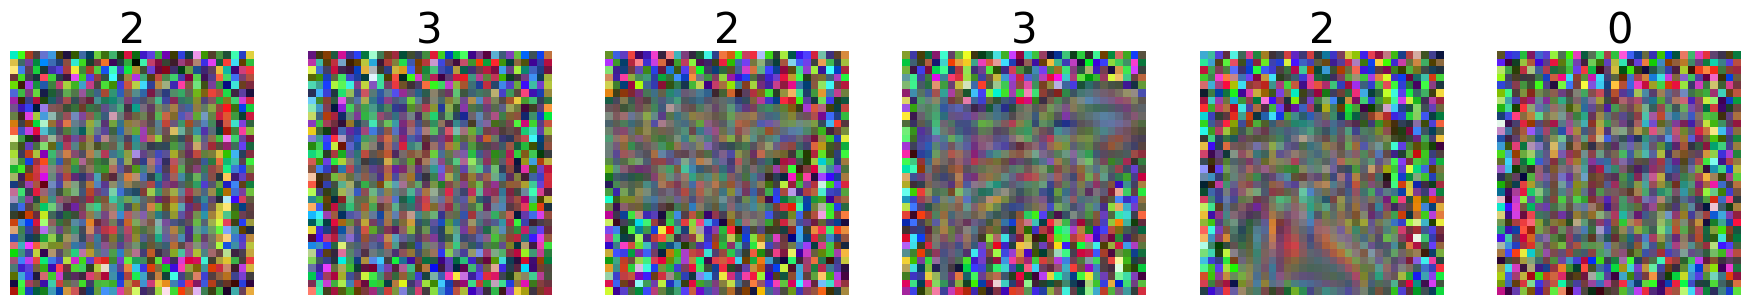

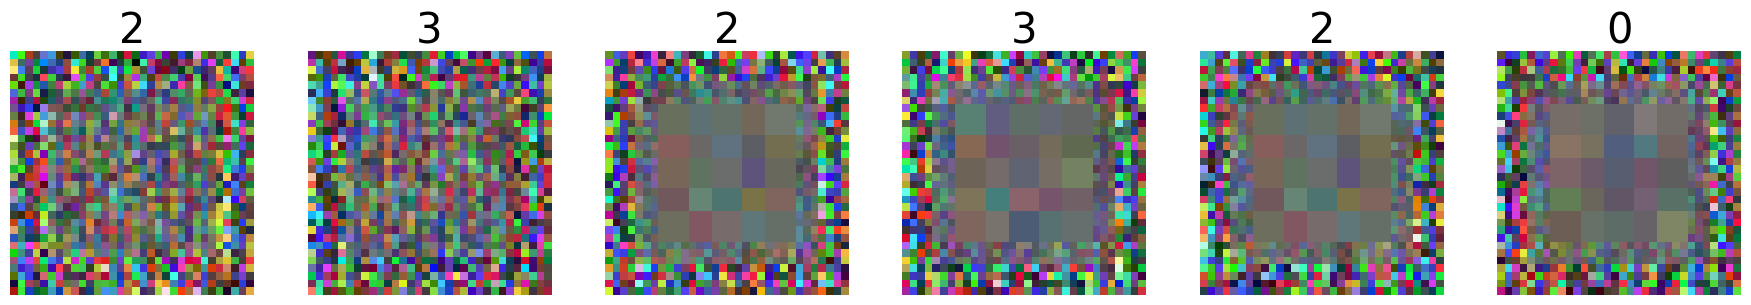

In [12]:
n_samples = 6
img_size = 32
figsize = (18, 3)
# transforms = [
#     "translate",
#     "shear",
#     "posterize",
#     "hue",
#     "pixelate",
#     "elastic",
# ]

fg_config = t2d.RandomForegroundsConfig(
    n_classes=4,
    seed=998,
    img_size=img_size,
    transforms=transforms,
)
bg_config = t2d.RandomBackgroundsConfig(
    seed=24,
    img_size=img_size,
)
config = t2d.Trans2DConfig(
    sampling_seed=483,
    transforms_sampling_seed=4,
    img_size=img_size,
    n_training_samples=n_samples,
    n_val_samples=n_samples,
    n_test_samples=n_samples,
    batch_size=n_samples,
)
for transform in [
    "elastic",
    "pixelate",
]:
    dataset = t2d.create_trans2d_dataset(
        config,
        transforms=[transform],
        foregrounds=fg_config,
        backgrounds=bg_config,
        normalize=False,
    )
    fig = show_dataset_samples(
        dataset,
        n_samples=n_samples,
        data_type="test",
        figsize=figsize,
    )
    fig.savefig(PLOTS_DIR / f"appendix_data_examples/rand_{transform}.png")

In [ ]:
# Changing the transforms sampling seed
config.transforms_sampling_seed = 5
dataset = t2d.create_trans2d_dataset(
    config,
    transforms=transforms,
    foregrounds=fg_config,
    backgrounds=bg_config,
    normalize=False,
)
fig = show_dataset_samples(
    dataset,
    n_samples=n_samples,
    data_type="test",
    figsize=(20, 10),
)

## Uniform backgrounds

In [ ]:
bg_config = t2d.UniformBackgroundsConfig(
    img_size=img_size,
    color=[0, 0, 0],
)
dataset = t2d.create_trans2d_dataset(
    config,
    transforms=[
        # "rotate",
        # "scale",
        # "hue",
        # "posterize",
        "elastic",
        # "translate",
    ],
    foregrounds=fg_config,
    backgrounds=bg_config,
    normalize=False,
)
fig = show_dataset_samples(
    dataset,
    n_samples=n_samples,
    data_type="test",
    figsize=(20, 10),
)

### Different transforms sampling seed

In [ ]:
config.transforms_sampling_seed = 5
dataset = t2d.create_trans2d_dataset(
    config,
    transforms=[
        # "rotate",
        # "scale",
        # "hue",
        # "posterize",
        "elastic",
        # "translate",
    ],
    foregrounds=fg_config,
    backgrounds=bg_config,
    normalize=False,
)
fig = show_dataset_samples(
    dataset,
    n_samples=n_samples,
    data_type="test",
    figsize=(20, 10),
)